In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

### 1. Importing & Cleaning Data

In [2]:
data = pd.read_csv('Spotify_Data.csv')
# selecting 2010's until 2020's songs to lighten the computation
data = data[data['year'] >= 2010].reset_index()
data = data.drop( columns = ['index'])
data.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.022200,['Tame Impala'],0.450,362880,0.849,0,4m3GHOgCNZMv0we7H9j8Y8,0.00455,5,0.0792,-5.075,1,Expectation,48,2010-05-21,0.0570,139.925,0.1610,2010
1,0.000103,['Bring Me The Horizon'],0.382,274133,0.943,0,0ZxZsjMMyLgjRV1XLWlIaS,0.00011,8,0.3960,-5.434,1,It Never Ends,50,2010-10-05,0.0872,105.032,0.1280,2010
2,0.852000,['Daft Punk'],0.179,162120,0.167,0,0Jc2SfIHv63JNsUZpunh54,0.74800,1,0.1060,-23.408,1,Solar Sailer,48,2010-01-01,0.0394,124.266,0.0399,2010
3,0.080900,['TobyMac'],0.507,266547,0.770,0,5QZunYrvUrJs3Mzrjl7fKV,0.00000,0,0.2140,-5.018,1,City On Our Knees,48,2010-02-05,0.0424,155.945,0.4820,2010
4,0.002960,['Kenny Chesney'],0.315,210640,0.925,0,0X0zDB7RqpWOIwCHGr2Whu,0.06420,0,0.1140,-4.507,1,Reality,47,2010-09-28,0.1170,185.305,0.4150,2010


In [3]:
# Checking column names  
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21656 entries, 0 to 21655
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      21656 non-null  float64
 1   artists           21656 non-null  object 
 2   danceability      21656 non-null  float64
 3   duration_ms       21656 non-null  int64  
 4   energy            21656 non-null  float64
 5   explicit          21656 non-null  int64  
 6   id                21656 non-null  object 
 7   instrumentalness  21656 non-null  float64
 8   key               21656 non-null  int64  
 9   liveness          21656 non-null  float64
 10  loudness          21656 non-null  float64
 11  mode              21656 non-null  int64  
 12  name              21656 non-null  object 
 13  popularity        21656 non-null  int64  
 14  release_date      21656 non-null  object 
 15  speechiness       21656 non-null  float64
 16  tempo             21656 non-null  float6

In [4]:
#checking missing value 
data.isna().sum()

acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
valence             0
year                0
dtype: int64

no missing value 

In [5]:
#checking duplicate value 
duplicate_val = data[data.duplicated()]
duplicate_val

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year


no duplicate value 

In [6]:
# changing artist's row name 
data['artists'] = data['artists'].str.strip("['']")
# recheck data
data.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.022200,Tame Impala,0.450,362880,0.849,0,4m3GHOgCNZMv0we7H9j8Y8,0.00455,5,0.0792,-5.075,1,Expectation,48,2010-05-21,0.0570,139.925,0.1610,2010
1,0.000103,Bring Me The Horizon,0.382,274133,0.943,0,0ZxZsjMMyLgjRV1XLWlIaS,0.00011,8,0.3960,-5.434,1,It Never Ends,50,2010-10-05,0.0872,105.032,0.1280,2010
2,0.852000,Daft Punk,0.179,162120,0.167,0,0Jc2SfIHv63JNsUZpunh54,0.74800,1,0.1060,-23.408,1,Solar Sailer,48,2010-01-01,0.0394,124.266,0.0399,2010
3,0.080900,TobyMac,0.507,266547,0.770,0,5QZunYrvUrJs3Mzrjl7fKV,0.00000,0,0.2140,-5.018,1,City On Our Knees,48,2010-02-05,0.0424,155.945,0.4820,2010
4,0.002960,Kenny Chesney,0.315,210640,0.925,0,0X0zDB7RqpWOIwCHGr2Whu,0.06420,0,0.1140,-4.507,1,Reality,47,2010-09-28,0.1170,185.305,0.4150,2010


### 2. Statistical Summary 

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21656 entries, 0 to 21655
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      21656 non-null  float64
 1   artists           21656 non-null  object 
 2   danceability      21656 non-null  float64
 3   duration_ms       21656 non-null  int64  
 4   energy            21656 non-null  float64
 5   explicit          21656 non-null  int64  
 6   id                21656 non-null  object 
 7   instrumentalness  21656 non-null  float64
 8   key               21656 non-null  int64  
 9   liveness          21656 non-null  float64
 10  loudness          21656 non-null  float64
 11  mode              21656 non-null  int64  
 12  name              21656 non-null  object 
 13  popularity        21656 non-null  int64  
 14  release_date      21656 non-null  object 
 15  speechiness       21656 non-null  float64
 16  tempo             21656 non-null  float6

In [8]:
categorical = ['artists', 'id', 'name', 'release_date']
numerical = ['acousticness', 'danceability', 'duration_ms', 'energy', 'explicit', 'instrumentalness', 'key', 
             'liveness', 'loudness', 'mode', 'popularity', 'speechiness', 'tempo', 'valence', 'year']

In [9]:
# describing each cateforical and numerical data 
data[categorical].describe()

,artists,id,name,release_date
count,21656,21656,21656,21656
unique,9170,21656,18659,2537
top,Taylor Swift,4m3GHOgCNZMv0we7H9j8Y8,Home,2010-01-01
freq,136,1,14,495


In [10]:
data[numerical].describe()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
count,21656.000000,21656.000000,2.165600e+04,21656.000000,21656.000000,21656.000000,21656.000000,21656.000000,21656.000000,21656.00000,21656.000000,21656.000000,21656.000000,21656.000000,21656.000000
mean,0.255491,0.605048,2.224077e+05,0.631091,0.302734,0.068246,5.201884,0.188202,-7.368521,0.64698,59.850526,0.104421,120.820850,0.463231,2014.942233
std,0.287580,0.170475,8.546179e+04,0.217466,0.459452,0.217755,3.596384,0.152302,4.695158,0.47792,10.537460,0.110202,30.662387,0.240015,3.142110
min,0.000000,0.000000,3.030100e+04,0.000020,0.000000,0.000000,0.000000,0.000000,-54.376000,0.00000,0.000000,0.000000,0.000000,0.000000,2010.000000
25%,0.026075,0.502000,1.871930e+05,0.500000,0.000000,0.000000,2.000000,0.097500,-8.332000,0.00000,53.000000,0.037200,96.808250,0.276000,2012.000000
50%,0.131000,0.618000,2.148800e+05,0.658000,0.000000,0.000001,5.000000,0.124000,-6.282500,1.00000,60.000000,0.054900,120.051000,0.452000,2015.000000
75%,0.409000,0.730000,2.463218e+05,0.798000,1.000000,0.000450,8.000000,0.232000,-4.806000,1.00000,66.000000,0.123000,140.923250,0.643000,2018.000000
max,0.996000,0.986000,5.403500e+06,1.000000,1.000000,1.000000,11.000000,0.990000,1.023000,1.00000,100.000000,0.950000,220.099000,0.990000,2020.000000


#### A. Univariate Analysis

boxplot

C:\Users\ASUS\AppData\Local\Temp/ipykernel_13468/3007607153.py:4: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(3, len(numerical)/3, i+1)
C:\Users\ASUS\AppData\Local\Temp/ipykernel_13468/3007607153.py:4: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(3, len(numerical)/3, i+1)
C:\Users\ASUS\AppData\Local\Temp/ipykernel_13468/3007607153.py:4: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(3, len(numerical)/3, i+1)
C:\Users\ASUS\AppData\Local\Temp/ipykernel_13468/3007607153.py:4: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be remove

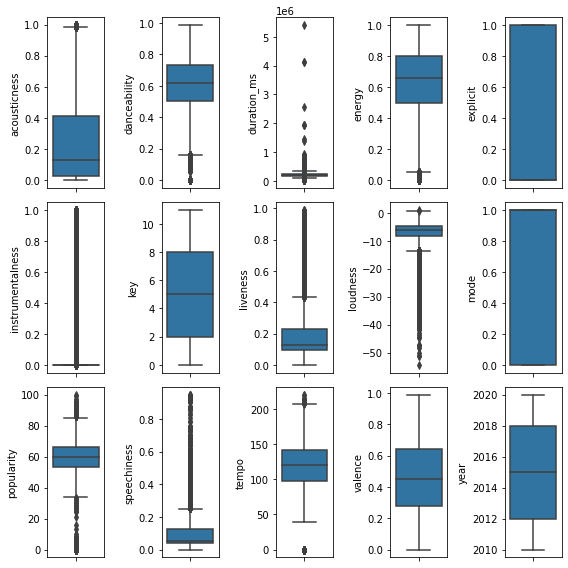

In [16]:
# plotting data['numerical']
plt.figure(figsize = (8,8))
for i in range (0, len(numerical)):
    plt.subplot(3, len(numerical)/3, i+1)
    sns.boxplot( y = data[numerical[i]])
    plt.tight_layout()
    

distribution

C:\Users\ASUS\AppData\Local\Temp/ipykernel_13468/2083705127.py:3: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(3, len(numerical)/3, i+1)
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ASUS\AppData\Local\Temp/ipykernel_13468/2083705127.py:3: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(3, len(numerical)/3, i+1)
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecat

C:\Users\ASUS\AppData\Local\Temp/ipykernel_13468/2083705127.py:3: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(3, len(numerical)/3, i+1)
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


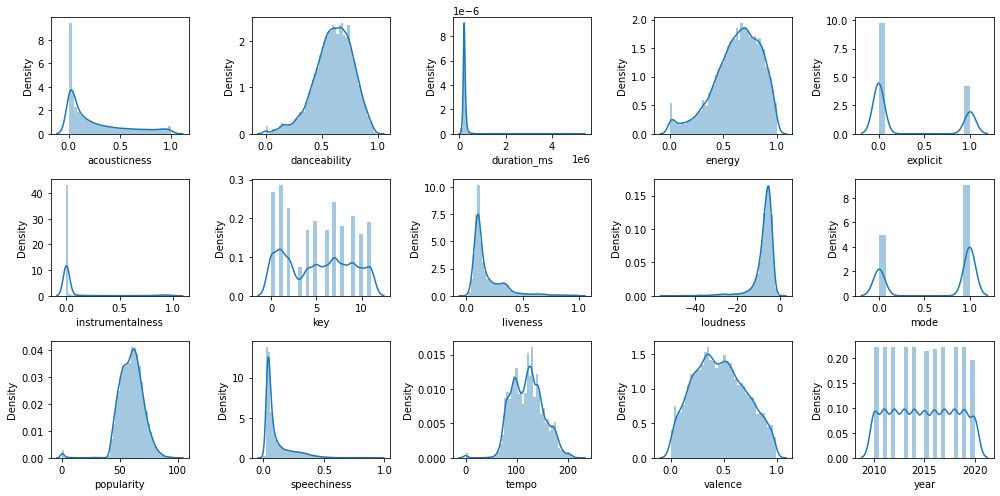

In [19]:
plt.figure(figsize = (14,7))
for i in range (0, len(numerical)):
    plt.subplot(3, len(numerical)/3, i+1)
    sns.distplot( data[numerical[i]])
    plt.tight_layout()

overview :
- based on the distribution plot, some columns need to be scalled

### 3. Data Preprocessing 

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21656 entries, 0 to 21655
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      21656 non-null  float64
 1   artists           21656 non-null  object 
 2   danceability      21656 non-null  float64
 3   duration_ms       21656 non-null  int64  
 4   energy            21656 non-null  float64
 5   explicit          21656 non-null  int64  
 6   id                21656 non-null  object 
 7   instrumentalness  21656 non-null  float64
 8   key               21656 non-null  int64  
 9   liveness          21656 non-null  float64
 10  loudness          21656 non-null  float64
 11  mode              21656 non-null  int64  
 12  name              21656 non-null  object 
 13  popularity        21656 non-null  int64  
 14  release_date      21656 non-null  object 
 15  speechiness       21656 non-null  float64
 16  tempo             21656 non-null  float6

In [22]:
# selecting feature to measure 
feature = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness',
          'speechiness', 'tempo', 'valence', 'popularity']
rsch_data = data[feature]
# defining x and y variable 
x = rsch_data.drop('popularity', axis = 1)
y = rsch_data['popularity']

In [23]:
# split the rsch_data to train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.5, random_state= 50)

### 4. Modelling With KNN

In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
#
list_acc = []
for i in range(1,20):
    print()
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    
    y_pred_knn = knn.predict(x_test)
    list_acc.append(accuracy_score(y_test, y_pred_knn))

In [27]:
list_acc

[0.03297007757665312,
 0.03407831547838936,
 0.031030661248614703,
 0.030291835980790542,
 0.028629479128186183,
 0.028629479128186183,
 0.029275951237532325,
 0.029275951237532325,
 0.030291835980790542,
 0.030384189139268564,
 0.03140007388252678,
 0.03297007757665312,
 0.03343184336904322,
 0.033247137052087185,
 0.033339490210565204,
 0.033339490210565204,
 0.03398596231991134,
 0.0342630217953454,
 0.03343184336904322]

<AxesSubplot:>

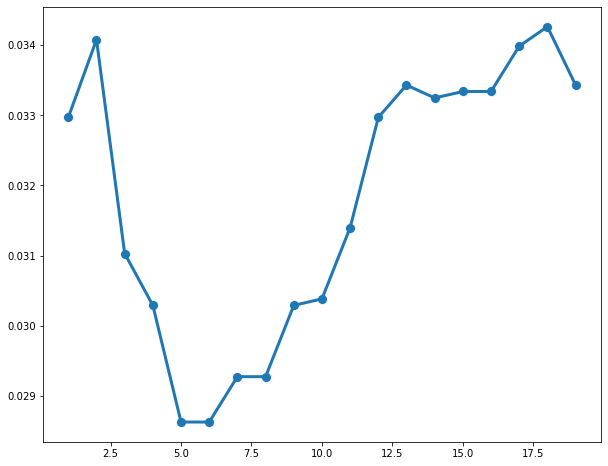

In [30]:
# plotting list_acc
plt.figure(figsize=(10,8))
sns.lineplot(x=range(1,20), y = list_acc, linewidth = 3)
sns.scatterplot(x=range(1,20), y = list_acc, s = 100)